Importing Dataset

In [409]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [410]:
#Reading csv file and converting it in dataframe
ds=pd.read_excel("Data_Train.xlsx")
ds1= pd.read_excel("Test_set.xlsx")
train=pd.DataFrame(ds)
test=pd.DataFrame(ds1)

In [334]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Dataset in Dataframe format.
Regression Model

In [335]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Test dataset

In [336]:
# Rows & Columns in dataset:
train.shape

(10683, 11)

Rows: 10683, Column: 11 of Train dataset

In [337]:
# Rows & Columns in dataset:
test.shape

(2671, 10)

Rows: 2671, Column: 10 of test dataset

In [338]:
# Datatype of dataset
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

10 object datatype , 1 numeric datatype

In [339]:
# Datatype of dataset
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

10 object datatype 

In [340]:
#Null Value:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

null value present in Route and Total_Stops columns.

In [341]:
#Null Value:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

no null value present.

In [411]:
train.dropna(inplace = True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

No null value as null values dropped

In [343]:
# Information about Dataset:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [344]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [345]:
# Checking Unique values of train Dataset:

column_name =train.columns.values
for column in column_name:
    print("{0}: {1}".format(column, train[column].unique()))

Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route: ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG 

Unique values of train Dataset

In [346]:
# Checking Unique values of test Dataset:

column_name =test.columns.values
for column in column_name:
    print("{0}: {1}".format(column, test[column].unique()))

Airline: ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Date_of_Journey: ['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6/04/2019' '1/06/2019' '3/03/2019'
 '27/03/2019' '9/06/2019' '3/05/2019' '1/04/2019' '18/06/2019'
 '15/04/2019' '6/05/2019' '9/03/2019' '3/04/2019' '27/06/2019'
 '21/06/2019' '21/04/2019' '18/04/2019' '9/04/2019' '24/05/2019'
 '01/03/2019' '09/03/2019' '27/05/2019' '03/03/2019' '27/04/2019'
 '1/03/2019' '24/04/2019' '12/04/2019']
Source: ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination: ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Route: ['DEL → BOM → COK' 'CCU → MAA → BLR' 'BLR → DEL' 'BLR → TRV → DEL'
 'CCU → HYD → B

Unique values of test Dataset

In [413]:
train['Additional_Info'].replace(['No Info','No info'])

0                             No info
1                             No info
2                             No info
3                             No info
4                             No info
                     ...             
10678    No check-in baggage included
10679    No check-in baggage included
10680    No check-in baggage included
10681    No check-in baggage included
10682    No check-in baggage included
Name: Additional_Info, Length: 10682, dtype: object

replacing No Info with No info

# Data Analysis

In [414]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Plotting of Numeric Datatype:

<AxesSubplot:xlabel='Price', ylabel='Density'>

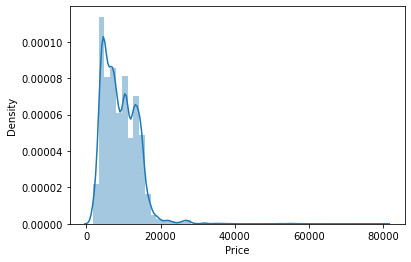

In [349]:
sns.distplot(train['Price'], kde=True)

Data is not normally distributed, skewness present

## Plotting categorical data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


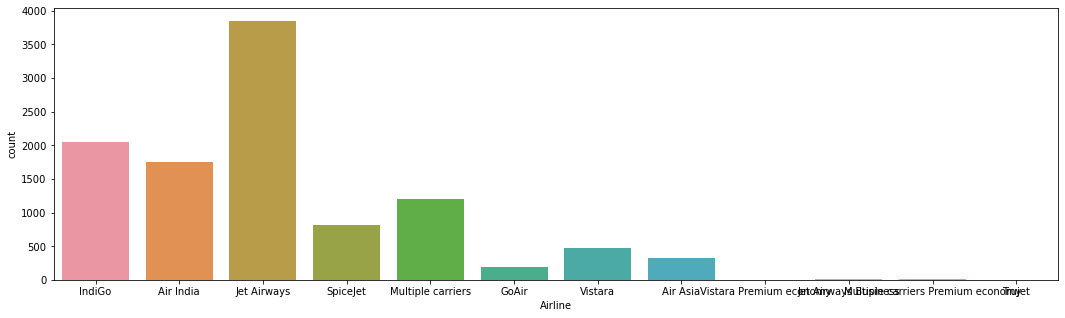

In [198]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x="Airline", data=train)
print(train["Airline"].value_counts())

Jet Aiways Airline has max count than other airline.

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64


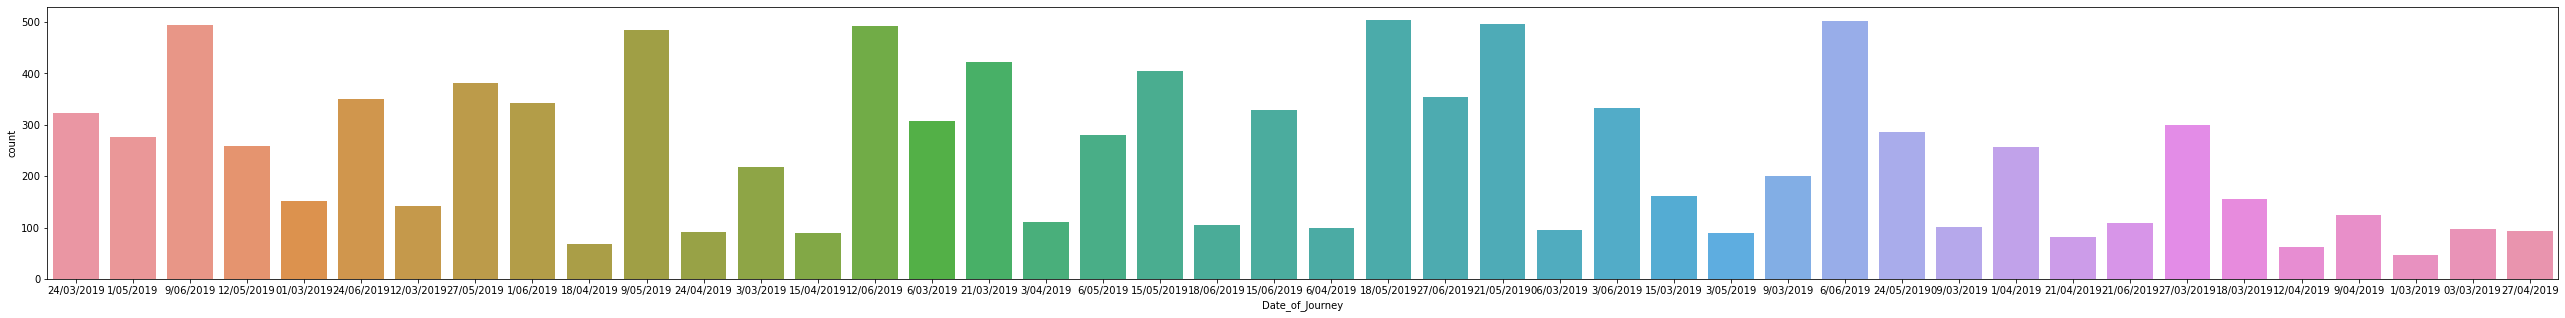

In [199]:
plt.figure(figsize=(45,5))
ax=sns.countplot(x="Date_of_Journey", data=train)
print(train["Date_of_Journey"].value_counts())

18/05/2019 and 06/06/2019 dates has maximumnumber of travellers.

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


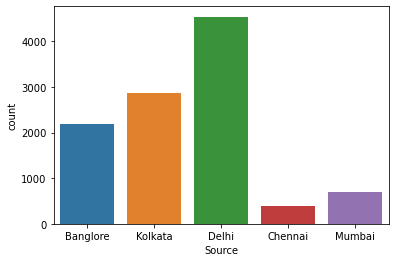

In [42]:
ax=sns.countplot(x="Source", data=train)
print(train["Source"].value_counts())

Delhi has high count of 4537 

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


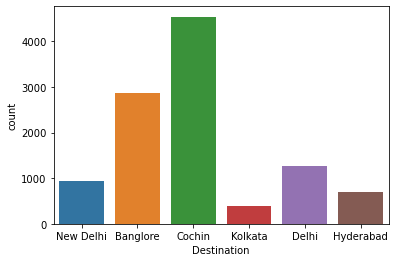

In [31]:
ax=sns.countplot(x="Destination", data=train)
print(train["Destination"].value_counts())

Maximum destination travelled is Cochin.

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BLR → HBX → BOM → NAG → DEL       1
CCU → IXB → DEL → BLR             1
BLR → HBX → BOM → BHO → DEL       1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64


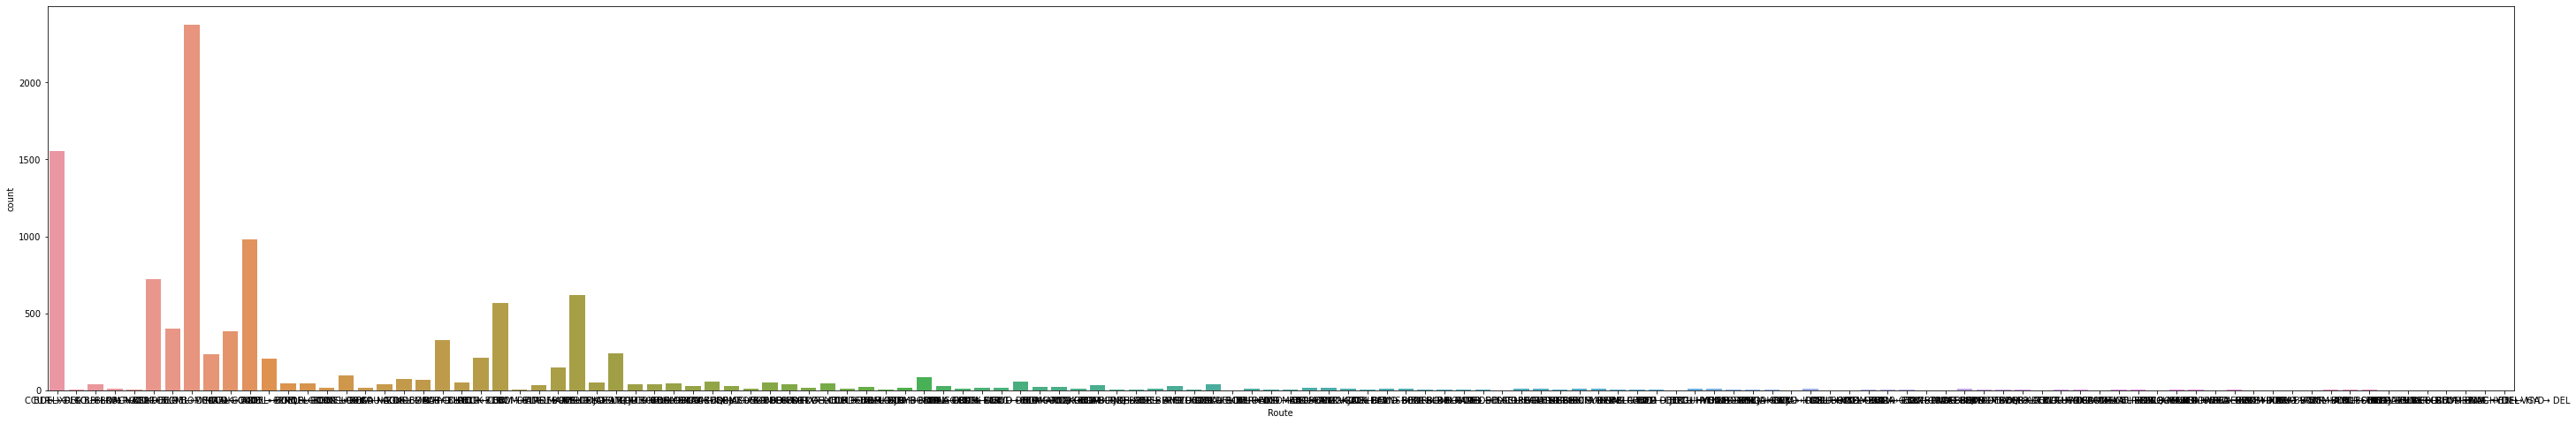

In [6]:
plt.figure(figsize=(50,8))
ax=sns.countplot(x="Route", data=train)
print(train["Route"].value_counts())

DEL → BOM → COK route was travelled maximum time.

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:50      1
12:45      1
16:25      1
22:25      1
01:35      1
Name: Dep_Time, Length: 222, dtype: int64


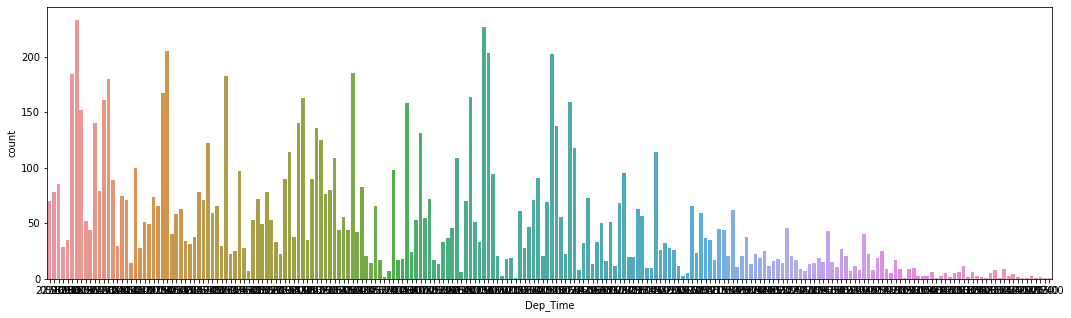

In [45]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x="Dep_Time", data=train)
print(train["Dep_Time"].value_counts())

18:55 depature time has maximum count.

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
02:20 04 Apr      1
04:35 04 Jun      1
01:10 22 Mar      1
02:20 04 Jun      1
14:35 25 May      1
Name: Arrival_Time, Length: 1343, dtype: int64


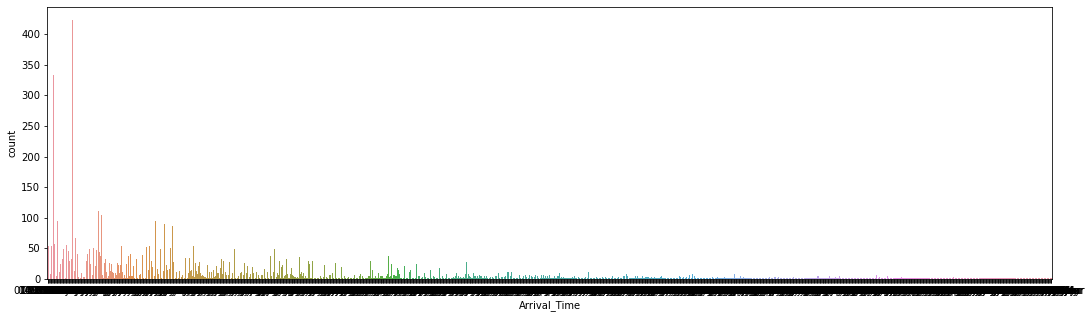

In [46]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x="Arrival_Time", data=train)
print(train["Arrival_Time"].value_counts())

19:00 arrival time has maximum count.

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
28h 30m      1
32h 20m      1
37h 10m      1
13h 35m      1
47h          1
Name: Duration, Length: 368, dtype: int64


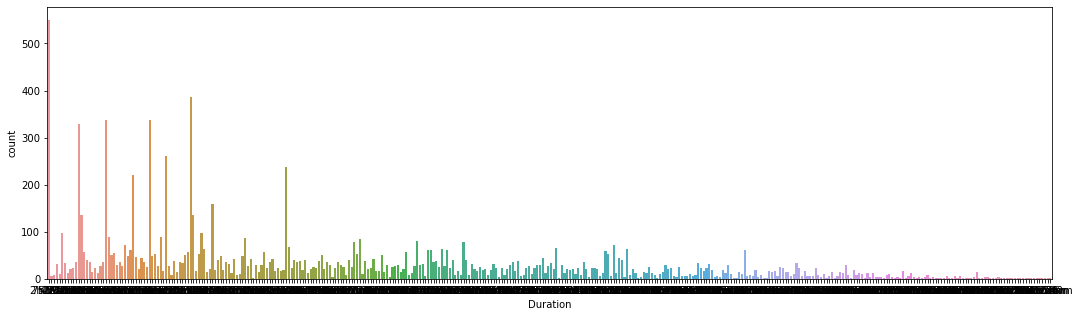

In [47]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x="Duration", data=train)
print(train["Duration"].value_counts())

2h 50m duration has maximum count.

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


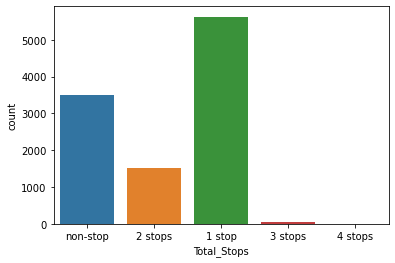

In [30]:
ax=sns.countplot(x="Total_Stops", data=train)
print(train["Total_Stops"].value_counts())

Maximum count is of 1 stop: 5626 

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


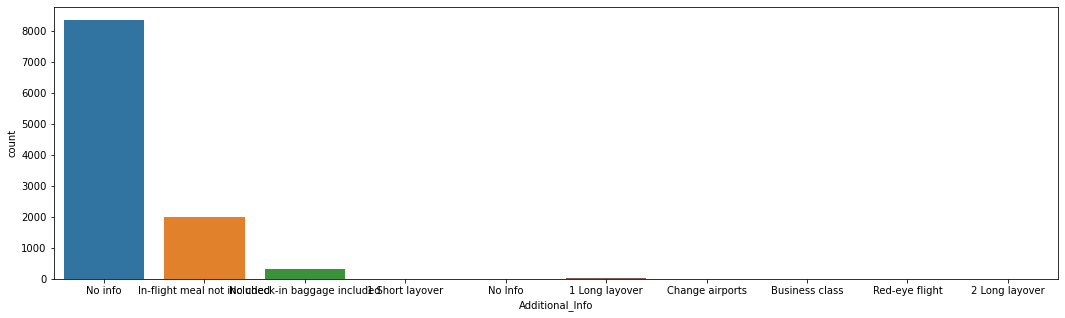

In [49]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x="Additional_Info", data=train)
print(train["Additional_Info"].value_counts())

No infor has maximum count

<Figure size 1440x360 with 0 Axes>

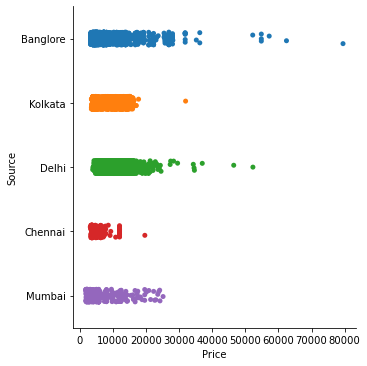

In [126]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Source", data = train)

Price of Delhi source is high

<Figure size 1440x360 with 0 Axes>

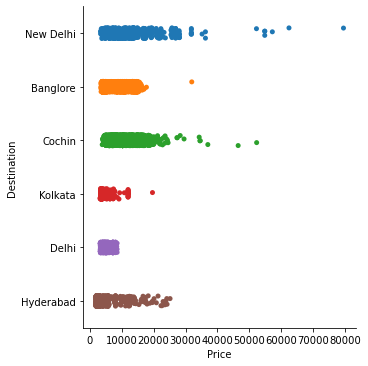

In [127]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Destination", data = train)

Common range in all destination lies between 0 to 100000

<Figure size 1440x360 with 0 Axes>

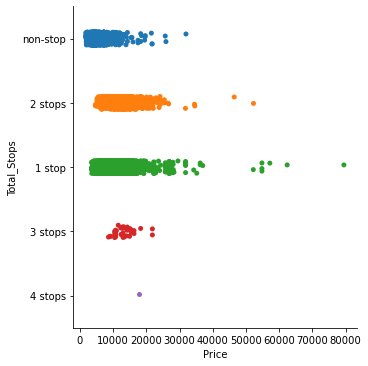

In [128]:
plt.figure(figsize=(20,5))
sns.catplot(x = "Price", y = "Total_Stops", data = train)

Maximum prices are for 1 stop 

# Encoding of DataFrame:

In [415]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in train.columns:
    if train[i].dtypes=="object":
        train[i]=en.fit_transform(train[i].values.reshape(-1,1))

In [416]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


train dataset encoded.

In [417]:
# Label Encoding for object to numeric test datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in test.columns:
    if test[i].dtypes=="object":
        test[i]=en.fit_transform(test[i].values.reshape(-1,1))

In [418]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


test dataset encoded

## Describing the dataset

In [419]:
train.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,23.733758,1.952256,1.436154,74.820165,107.983898,869.846564,194.072177,1.458248,7.392998,9087.214567
std,2.352090,12.337569,1.177276,1.474845,36.729039,61.087537,331.519717,108.625225,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


Key Observations:

    1. Mean and Median: Values of mean and median have differences alternatively so skewness are present.
    2. 75% percentile and max: Airline, source, additional info and price has outliers.
    3. Standard deviation is less than mean so high peak data.

In [420]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,23.662673,1.961438,1.432797,54.356421,96.249719,435.586672,169.453014,1.422688,4.634594
std,2.295657,12.536017,1.184328,1.467971,27.128993,54.620936,193.250349,93.907162,1.795728,0.760781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,33.000000,48.000000,276.000000,91.000000,0.000000,5.000000
50%,4.000000,24.000000,2.000000,1.000000,51.000000,88.000000,481.000000,209.000000,0.000000,5.000000
75%,6.000000,35.000000,3.000000,2.000000,76.000000,146.000000,600.000000,241.000000,4.000000,5.000000
max,10.000000,43.000000,4.000000,5.000000,99.000000,198.000000,703.000000,319.000000,4.000000,5.000000


Key Observations:

    1. Mean and Median: Values of mean and median have differences alternatively so skewness are present.
    2. 75% percentile and max: Dep_Time and duration have highest outliers.
    3. Standard deviation is less than mean so high peak data.

<AxesSubplot:>

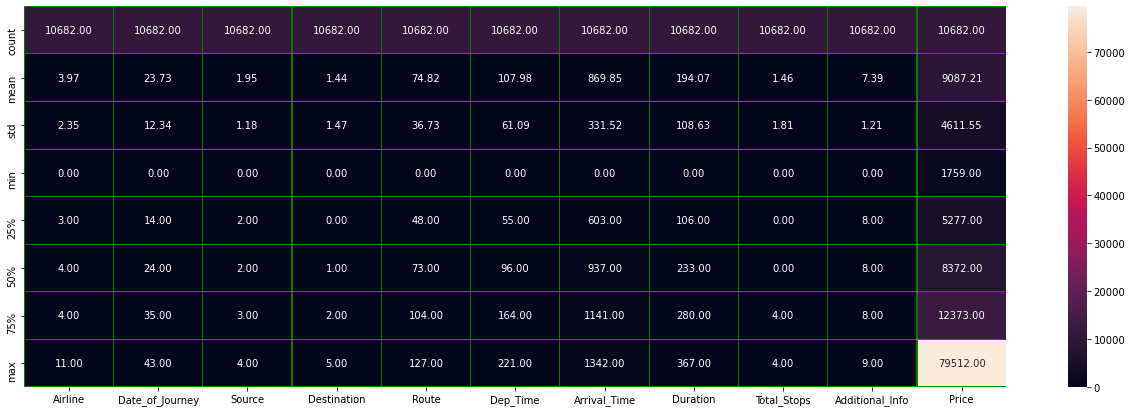

In [421]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers

Airline                AxesSubplot(0.125,0.71587;0.110714x0.16413)
Date_of_Journey     AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Source              AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Destination         AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Route               AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Dep_Time            AxesSubplot(0.789286,0.71587;0.110714x0.16413)
Arrival_Time          AxesSubplot(0.125,0.518913;0.110714x0.16413)
Duration           AxesSubplot(0.257857,0.518913;0.110714x0.16413)
Total_Stops        AxesSubplot(0.390714,0.518913;0.110714x0.16413)
Additional_Info    AxesSubplot(0.523571,0.518913;0.110714x0.16413)
Price              AxesSubplot(0.656429,0.518913;0.110714x0.16413)
dtype: object

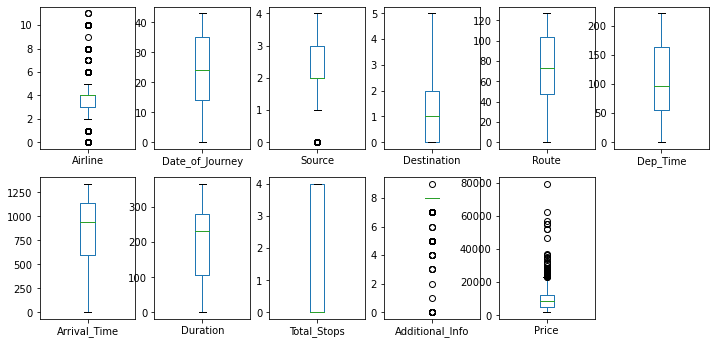

In [422]:
train.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,12))

Airline, source, additional info and price has outliers.

Airline                AxesSubplot(0.125,0.71587;0.110714x0.16413)
Date_of_Journey     AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Source              AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Destination         AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Route               AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Dep_Time            AxesSubplot(0.789286,0.71587;0.110714x0.16413)
Arrival_Time          AxesSubplot(0.125,0.518913;0.110714x0.16413)
Duration           AxesSubplot(0.257857,0.518913;0.110714x0.16413)
Total_Stops        AxesSubplot(0.390714,0.518913;0.110714x0.16413)
Additional_Info    AxesSubplot(0.523571,0.518913;0.110714x0.16413)
dtype: object

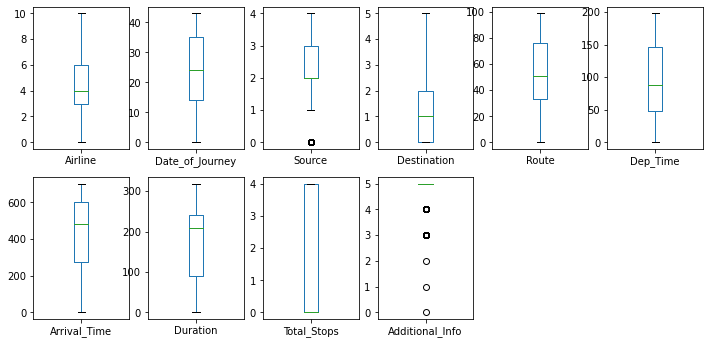

In [423]:
test.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,12))

Only additional infor has small dataset

In [424]:
#zscore for outlier removal

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(train))
threshold=3
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
          826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
         1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
         2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
         2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
         3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
         4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
         5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
         6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
         7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
         8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
         8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
         9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
        10382, 10438, 10510, 10510], dtype=int64),
 array([10, 10, 10, 10, 10

In [425]:
#removing value greater than threshold value 

df_new=train[(z<3).all(axis=1)]
train= df_new


Outliers removed

In [426]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [427]:
train.shape

(10577, 11)

In [428]:
Rows: 10572 ; Column: 11

#### Percentage Loss of data: Train dataset

In [429]:
Data_loss=((10683-10572)/10683)*100
Data_loss

1.0390339792193204

1% data loss

# Correlation of the columns with the target columns:

In [430]:
train.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.020230,-0.015334,0.022059,0.022966,-0.040582,-0.014182,0.027133,0.036283,-0.067733,-0.044535
Date_of_Journey,0.020230,1.000000,0.147610,-0.248444,0.256375,-0.010257,-0.011386,-0.002251,-0.055443,-0.012156,0.025642
Source,-0.015334,0.147610,1.000000,-0.582837,0.390602,0.055611,0.020406,-0.195907,-0.237867,-0.041733,0.077215
Destination,0.022059,-0.248444,-0.582837,1.000000,-0.442636,-0.064592,-0.037922,0.023395,0.360340,0.054750,-0.175534
Route,0.022966,0.256375,0.390602,-0.442636,1.000000,-0.084290,0.011584,-0.063814,-0.454731,0.018228,0.255378
Dep_Time,-0.040582,-0.010257,0.055611,-0.064592,-0.084290,1.000000,-0.020277,0.041005,0.044246,-0.056142,0.001756
Arrival_Time,-0.014182,-0.011386,0.020406,-0.037922,0.011584,-0.020277,1.000000,0.028571,-0.099283,0.019897,0.040803
Duration,0.027133,-0.002251,-0.195907,0.023395,-0.063814,0.041005,0.028571,1.000000,0.176168,0.076945,-0.170010
Total_Stops,0.036283,-0.055443,-0.237867,0.360340,-0.454731,0.044246,-0.099283,0.176168,1.000000,0.162907,-0.621744
Additional_Info,-0.067733,-0.012156,-0.041733,0.054750,0.018228,-0.056142,0.019897,0.076945,0.162907,1.000000,-0.038248


correlation of input with target variable Price

<AxesSubplot:>

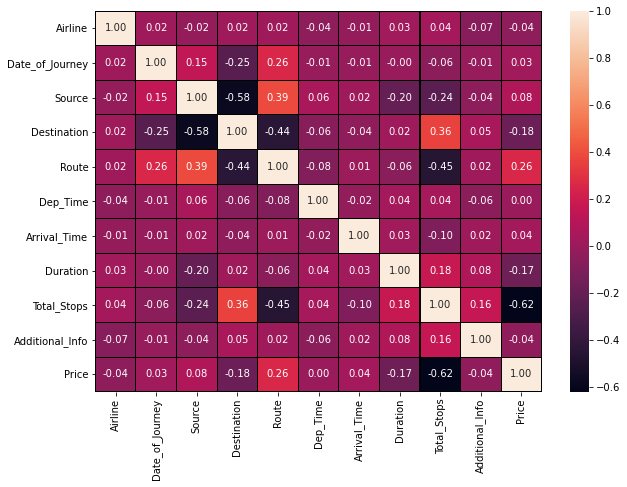

In [431]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Price have positive correlation with Route and negative correlation with Total_Stops.
 2. Route has positive correlation with Source and negative correlation with Total_Stops
 3. Multicollinearity exist

## Separating Target and feature variables

In [432]:
x= train.drop("Price",axis=1)
y= train["Price"]


### Multicollinearity removal using VIF


In [433]:
# Importing library:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [434]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [435]:
vif_calc()

   VIF Factor         features
0    3.671174          Airline
1    5.111955  Date_of_Journey
2    5.745781           Source
3    3.050086      Destination
4    7.995677            Route
5    3.927396         Dep_Time
6    0.464033     Arrival_Time
7    4.437446         Duration
8    2.390229      Total_Stops
9   22.142154  Additional_Info


Only Additional_Info has higher skewness()

## Data Cleaning:

In [436]:
x.drop(['Additional_Info','Route'],axis=1,inplace=True)
x.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,3,24,0,5,211,233,240,4
1,1,6,3,0,31,906,336,1
2,4,43,2,1,70,413,106,1
3,3,10,3,0,164,1324,311,0
4,3,0,0,5,149,1237,303,0


Additional_Info dropped as its vif value is high.

## Skewness: 

In [437]:
x.skew()

Airline            0.731671
Date_of_Journey   -0.061745
Source            -0.439175
Destination        1.269331
Dep_Time           0.193999
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.618057
dtype: float64

Taking range of skewness between +/- 0.5, all values are under control so no need to remove skewness.

In [438]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [439]:
#converting ndarray to dataframe:
x=pd.DataFrame(x)
#x.skew()

In [440]:
x.skew()

0   -0.015559
1   -0.214215
2   -0.234461
3    0.040873
4   -0.150750
5   -0.382585
6   -0.391226
7    0.316936
dtype: float64

skewness removed

# Scaling Data

In [441]:
# Train dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.2949382 ,  0.05882919, -1.61518992, ..., -1.79713824,
         0.45947604,  1.28725538],
       [-1.41828256, -1.51922563,  0.89696943, ...,  0.040615  ,
         1.24240327,  0.34209003],
       [ 0.14733965,  1.48832913, -0.02768761, ..., -1.38582843,
        -0.74978597,  0.34209003],
       ...,
       [ 0.14733965,  0.45019765, -1.61518992, ..., -0.22054108,
         0.79179844,  1.28725538],
       [ 2.11609816, -2.20872491, -1.61518992, ...,  0.14473559,
         0.44259671,  1.28725538],
       [-1.41828256,  1.41646811, -0.02768761, ...,  0.77280053,
         1.32917468,  0.34209003]])

# Model Selection :

## Linear Regression:

In [442]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [443]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.29919707159408937
At random state 0,the testing accuracy is:- 0.2732548366809868


At random state 1,the training accuracy is:- 0.29750572702730027
At random state 1,the testing accuracy is:- 0.2791235037435871


At random state 2,the training accuracy is:- 0.2942691105478352
At random state 2,the testing accuracy is:- 0.29278543882456876


At random state 3,the training accuracy is:- 0.29229310920130447
At random state 3,the testing accuracy is:- 0.3001114568645725


At random state 4,the training accuracy is:- 0.293939442442513
At random state 4,the testing accuracy is:- 0.29386008509777806


At random state 5,the training accuracy is:- 0.30088486463147723
At random state 5,the testing accuracy is:- 0.26446190644267775


At random state 6,the training accuracy is:- 0.2991769854535188
At random state 6,the testing accuracy is:- 0.2728260971023927


At random state 7,the training accuracy is:- 0.2966201046702297
At random state 7,the testi

At random state 70,the testing accuracy is:- 0.2872441384991785


At random state 71,the training accuracy is:- 0.29299871654953913
At random state 71,the testing accuracy is:- 0.29708180541389007


At random state 72,the training accuracy is:- 0.2948049892459481
At random state 72,the testing accuracy is:- 0.2902758207809655


At random state 73,the training accuracy is:- 0.28926653218562615
At random state 73,the testing accuracy is:- 0.31187097667480534


At random state 74,the training accuracy is:- 0.284462474550478
At random state 74,the testing accuracy is:- 0.33202518394633895


At random state 75,the training accuracy is:- 0.296174621963336
At random state 75,the testing accuracy is:- 0.2834733939723002


At random state 76,the training accuracy is:- 0.2946457707526605
At random state 76,the testing accuracy is:- 0.2898308287504199


At random state 77,the training accuracy is:- 0.2991862378922774
At random state 77,the testing accuracy is:- 0.2711447900352896


At random stat

In [444]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.3052749198422047

30% is Linear regression score

In [445]:
#Predicted data
pred=lr.predict(test_x)
pred

array([10847.32850043,  8326.66601145,  8600.96091998, ...,
        5476.94388272,  5918.93158282,  8424.89262039])

In [446]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 11800917.76598578
Mean absolute error: 2799.1601260756047
R2Score: 0.3052749198422047


R2Score = 30%

### Cross-Validation of the model:

In [447]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.29168238787117695 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 3 the cv score is 0.2922665927513784 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 4 the cv score is 0.2925148090258367 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 5 the cv score is 0.2919406281721674 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 6 the cv score is 0.291400820722682 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 7 the cv score is 0.2916328209579794 and accuracy score for training is 0.2909477156095518 and accuracy for the testing is 0.3052749198422047


At cross fold 8 the cv score is 0.2923843344376408 a

cv score calculated

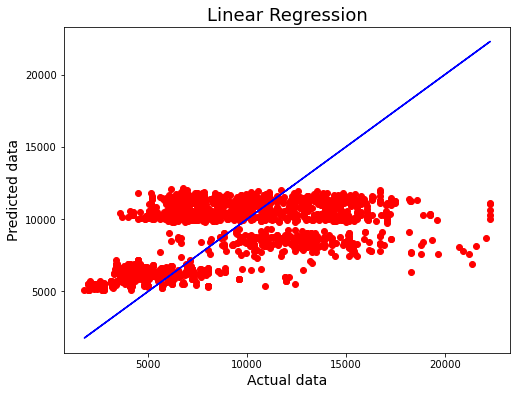

In [448]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plotting of Predicted and actual data

### Regularization

In [449]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [450]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


Best parameters for Linear Regression

In [451]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.29094704120729964
r2 score 30.526019268653236


Ls score is 29% and r2score is 30.5%

In [452]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.2919504057770228

cv score is 29%

## 1. Random Forest Regressor


Best parameters for Random Forest Regressor

In [ ]:
rf= RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
predrf = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,predrf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)
print("Mean squared error:",mean_squared_error(test_y,predrf))
print("Mean absolute error:",mean_absolute_error(test_y,predrf))

rf score 96.9% R2 Score: 77% Cross Val Score: 79%

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predrf, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

## 2. Decision Tree Regressor

In [454]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


Best parameters for DecisionTreeRegressor

In [455]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth=8,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
predt = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,predt)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,predt))
print("Mean absolute error:",mean_absolute_error(test_y,predt))

dt score 0.5804691243027915
R2 Score: 59.60427205254606
Cross Val Score: 57.846588972516535
Mean squared error: 6861802.995463494
Mean absolute error: 2026.545734931325


dt score is 58% , r2score is 59.6% and cross val score is 57.8%

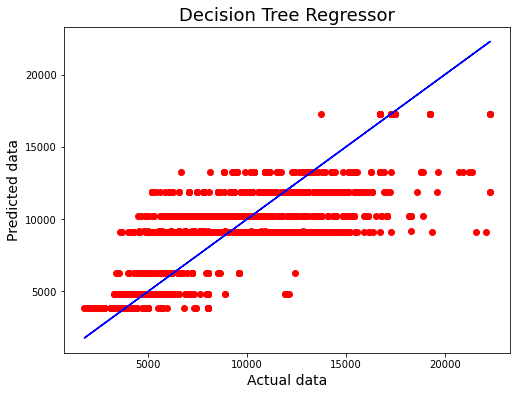

In [456]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predt, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

## 3. KNeighborsRegressor

In [457]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 6, 'weights': 'uniform'}


Best parameters for KNeighborsRegressor 

In [459]:
kn =KNeighborsRegressor(n_neighbors=6,algorithm="brute",weights='uniform')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
predkn = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,predkn)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=9)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,predkn))
print("Mean absolute error:",mean_absolute_error(test_y,predkn))

kn score 0.7698346474922212
R2 Score: 68.43201133621561
Cross Val Score: 68.12360037839011
Mean squared error: 5362282.849703318
Mean absolute error: 1661.237791430372


kn score 76%
R2 Score: 68.4%
Cross Val Score: 68.1%

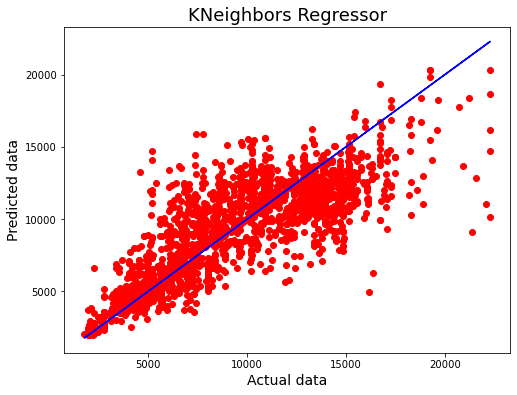

In [460]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predkn, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

## 4. SVRegressor

Best parameters for SV Regressor

In [ ]:
svr =SVR(C=1000,gamma=0.1,kernel='rbf')
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
predsvr = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,predsvr)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=9)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,predsvr))
print("Mean absolute error:",mean_absolute_error(test_y,predsvr))

In [ ]:
svr score = 88.8%
r2score = 81.5%
cross val score = 75.7%

Best Model is KNeighborRegressor as the difference between r2score and cross val score is less 

# Model saving:

In [462]:
import pickle
filename = 'flight_prices.pkl'
pickle.dump(kn, open(filename, 'wb'))

## Accuracy

In [463]:
loaded_model = pickle.load(open('flight_prices.pkl','rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.6843201133621561


68.4% accuracy of model.

## Conclusion:


In [464]:
import numpy as np
a=np.array(test_y)
predkn =np.array(kn.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predkn},index=range(len(a)))
df_com

,original,predicted
0,12373,12196.166667
1,11543,11814.666667
2,11491,12122.500000
3,7191,7443.166667
4,12646,11356.000000
...,...,...
2111,8085,8364.833333
2112,11160,6638.833333
2113,2017,1983.000000
2114,4273,4655.000000


Model is able to predict values which are approximately actual data as model's accuracy is 69%